<a href="https://colab.research.google.com/github/lalithagundluru/Data-Scientist-salaries-estimation/blob/main/3_Linr_Reg_With_Ridge_Lasso_Hyper_Parameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import pandas as pd
import numpy as np
import os
import re
#datapath = r'C:\Users\gn221m\PERSONAL\Devaraj\Case Data set\Data'
#os.chdir(datapath)
import seaborn as sns

# Dataset1

In [2]:
sales_data=pd.read_csv("sales_data.csv")

In [3]:
sales_data.head(5)

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1.0,13927.0,934.0,18680.0
1,20160109,3.0,10289.0,1592.0,28646.0
2,20160109,4.0,357.0,22.0,440.0
3,20160109,6.0,23113.0,2027.0,81088.0
4,20160109,7.0,23177.0,3231.0,58164.0


In [4]:
sales_data.tail(2)

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
108007,20160213,38980.0,45452.0,15966.0,12474.0
108008,20,NaN,NaN,NaN,NaN


In [5]:
sales_data.shape

(108009, 5)

In [6]:
sales_data.isnull().sum()

system_calendar_key_N    0
product_id               1
sales_dollars_value      1
sales_units_value        1
sales_lbs_value          1
dtype: int64

In [7]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
system_calendar_key_N,108009.0,2.015996e+07,61342.757207,20.0,20160116.0,20160123.0,20160206.00,20160213.0
product_id,108008.0,2.748217e+04,14866.954060,1.0,14276.0,27518.0,40110.00,54869.0
sales_dollars_value,108008.0,2.346833e+04,86962.511013,0.0,522.0,2761.0,13201.75,4395964.0
sales_units_value,108008.0,5.942083e+03,30468.304195,1.0,84.0,439.0,1954.00,797901.0
sales_lbs_value,108008.0,1.959161e+04,148473.968025,0.0,95.0,705.0,4676.00,11003100.0


In [8]:
sales_data.describe()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
count,1.080090e+05,108008.000000,1.080080e+05,108008.000000,1.080080e+05
mean,2.015996e+07,27482.165923,2.346833e+04,5942.082809,1.959161e+04
std,6.134276e+04,14866.954060,8.696251e+04,30468.304195,1.484740e+05
min,2.000000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00
25%,2.016012e+07,14276.000000,5.220000e+02,84.000000,9.500000e+01
50%,2.016012e+07,27518.000000,2.761000e+03,439.000000,7.050000e+02
75%,2.016021e+07,40110.000000,1.320175e+04,1954.000000,4.676000e+03
max,2.016021e+07,54869.000000,4.395964e+06,797901.000000,1.100310e+07


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108009 entries, 0 to 108008
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   system_calendar_key_N  108009 non-null  int64  
 1   product_id             108008 non-null  float64
 2   sales_dollars_value    108008 non-null  float64
 3   sales_units_value      108008 non-null  float64
 4   sales_lbs_value        108008 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.1 MB


In [10]:
from datetime import datetime

In [11]:
sales_data['system_calendar_key_N']=pd.to_datetime(sales_data['system_calendar_key_N'],format='%Y%m%d', errors='ignore')

In [12]:
print(sales_data.dtypes)

system_calendar_key_N      int64
product_id               float64
sales_dollars_value      float64
sales_units_value        float64
sales_lbs_value          float64
dtype: object


In [13]:
sales_data.head()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1.0,13927.0,934.0,18680.0
1,20160109,3.0,10289.0,1592.0,28646.0
2,20160109,4.0,357.0,22.0,440.0
3,20160109,6.0,23113.0,2027.0,81088.0
4,20160109,7.0,23177.0,3231.0,58164.0


# Dataset2

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
google_search_data=pd.read_csv("google_search_data.csv")

In [16]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,349,916,1,2014
1,06-01-2014,google,349,916,2,2014
2,07-01-2014,google,697,916,2,2014
3,10-01-2014,google,349,916,2,2014
4,20-01-2014,google,697,916,4,2014


In [17]:
google_search_data.tail()

,date,platform,searchVolume,Claim_ID,week_number,year_new
181560,05-09-2019,walmart,125,980,36,2019
181561,22-09-2019,walmart,84,980,38,2019
181562,26-09-2019,walmart,42,980,39,2019
181563,15-07-2019,walmart,42,622,29,2019
181564,02-09-2019,walmart,42,689,36,2019


In [18]:
google_search_data['platform'].value_counts()

google     138115
amazon      23828
chewy       13352
walmart      6270
Name: platform, dtype: int64

In [19]:
google_search_data['year_new'].value_counts()

2018    51388
2019    38682
2017    27399
2016    22280
2015    21372
2014    20444
Name: year_new, dtype: int64

In [20]:
google_search_data.shape

(181565, 6)

In [21]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchVolume  181565 non-null  int64 
 3   Claim_ID      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB


In [22]:
google_search_data["date"]=pd.to_datetime(google_search_data["date"],format='%d-%m-%Y', errors='ignore')

In [23]:
google_search_data.isnull().sum()

date            0
platform        0
searchVolume    0
Claim_ID        0
week_number     0
year_new        0
dtype: int64

In [24]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,2014-01-05,google,349,916,1,2014
1,2014-01-06,google,349,916,2,2014
2,2014-01-07,google,697,916,2,2014
3,2014-01-10,google,349,916,2,2014
4,2014-01-20,google,697,916,4,2014


In [25]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          181565 non-null  datetime64[ns]
 1   platform      181565 non-null  object        
 2   searchVolume  181565 non-null  int64         
 3   Claim_ID      181565 non-null  int64         
 4   week_number   181565 non-null  int64         
 5   year_new      181565 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 8.3+ MB


In [26]:
print(google_search_data['date'].dtype)

datetime64[ns]


In [27]:
google_search_data.sort_values(by="date", inplace=True)

In [28]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
1147,2014-01-01,google,889,922,1,2014
2365,2014-01-01,google,240,707,1,2014
3802,2014-01-01,google,1131,901,1,2014
13726,2014-01-01,google,1725,177,1,2014
1827,2014-01-01,google,2636,100,1,2014


In [29]:
google_search_data = google_search_data.reset_index(drop=True)

In [30]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,2014-01-01,google,889,922,1,2014
1,2014-01-01,google,240,707,1,2014
2,2014-01-01,google,1131,901,1,2014
3,2014-01-01,google,1725,177,1,2014
4,2014-01-01,google,2636,100,1,2014


# Dataset 3

In [31]:
themes_product_data=pd.read_csv("Theme_product_list.csv")

In [32]:
themes_product_data.shape

(91485, 2)

In [33]:
themes_product_data.head()

,PRODUCT_ID,CLAIM_ID
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [34]:
themes_product_data.isnull().sum()

PRODUCT_ID    0
CLAIM_ID      0
dtype: int64

# Dataset4

In [35]:
social_media_data=pd.read_excel('social_media_data.xlsx')

In [36]:
social_media_data.head(2)

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,76
1,148.0,2015-10-10 00:00:00,31


In [37]:
social_media_data.shape

(533390, 3)

In [38]:
social_media_data.isnull().sum()

Theme Id          218511
published_date         0
total_post             0
dtype: int64

In [39]:
social_media_data = social_media_data.dropna(subset=['Theme Id'])

In [40]:
social_media_data.reset_index(drop=True, inplace=True)

In [41]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314879 entries, 0 to 314878
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        314879 non-null  float64
 1   published_date  314879 non-null  object 
 2   total_post      314879 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ MB


In [42]:
social_media_data['Theme Id']=social_media_data['Theme Id'].astype(int)

In [43]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314879 entries, 0 to 314878
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Theme Id        314879 non-null  int64 
 1   published_date  314879 non-null  object
 2   total_post      314879 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ MB


In [44]:
social_media_data['published_date']=pd.to_datetime(social_media_data['published_date'])

In [45]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314879 entries, 0 to 314878
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Theme Id        314879 non-null  int64         
 1   published_date  314879 non-null  datetime64[ns]
 2   total_post      314879 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 7.2 MB


# dataset 5

In [46]:
product_manufacture_list=pd.read_csv("product_manufacturer_list.csv")

In [47]:
product_manufacture_list.head()

,PRODUCT_ID,Vendor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Others,NaN,NaN,NaN,NaN,NaN
1,2,Others,NaN,NaN,NaN,NaN,NaN
2,3,Others,NaN,NaN,NaN,NaN,NaN
3,4,Others,NaN,NaN,NaN,NaN,NaN
4,5,Others,NaN,NaN,NaN,NaN,NaN


In [48]:
product_manufacture_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRODUCT_ID  67175 non-null  int64  
 1   Vendor      67175 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ MB


In [49]:
for col in product_manufacture_list.columns:
    print(col)

PRODUCT_ID
Vendor
Unnamed: 2
Unnamed: 3
Unnamed: 4
Unnamed: 5
Unnamed: 6


In [50]:
product_manufacture_list.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6"], axis=1, inplace=True)

In [51]:
product_manufacture_list = product_manufacture_list[['PRODUCT_ID','Vendor']]

In [52]:
product_manufacture_list.isnull().sum()

PRODUCT_ID    0
Vendor        0
dtype: int64

In [53]:
product_manufacture_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  67175 non-null  int64 
 1   Vendor      67175 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [54]:
product_manufacture_list.shape

(67175, 2)

# Dataset 6

In [55]:
themes_list=pd.read_csv("Theme_list.csv")

In [56]:
themes_list.head()

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla


In [57]:
themes_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CLAIM_ID    208 non-null    int64 
 1   Claim Name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [58]:
themes_list.isnull().sum()

CLAIM_ID      0
Claim Name    0
dtype: int64

In [59]:
themes_list.shape

(208, 2)

In [60]:
themes_list['CLAIM_ID'].nunique()

208

In [61]:
themes_list['CLAIM_ID'].unique()

array([  0,   8,  15,  16,  26,  32,  38,  39,  40,  58,  59,  65,  73,
        75,  79,  80,  81, 100, 101, 120, 125, 138, 139, 142, 143, 144,
       145, 147, 148, 151, 152, 157, 158, 163, 171, 173, 177, 178, 185,
       186, 187, 191, 192, 193, 197, 207, 211, 220, 222, 224, 227, 228,
       287, 384, 385, 388, 393, 430, 432, 433, 437, 438, 440, 441, 916,
       650, 713, 979, 620, 543, 904, 754, 821, 984, 777, 670, 761, 780,
       941, 832, 608, 681, 913, 622, 738, 600, 601, 788, 867, 977, 928,
       813, 847, 702, 587, 842, 823, 743, 907, 974, 510, 747, 884, 931,
       803, 526, 860, 869, 870, 852, 541, 839, 634, 789, 618, 519, 576,
       844, 583, 606, 918, 716, 594, 889, 980, 930, 616, 901, 982, 556,
       741, 682, 558, 965, 657, 536, 507, 516, 981, 816, 555, 707, 944,
       903, 999, 677, 782, 959, 566, 659, 704, 915, 605, 632, 668, 732,
       770, 877, 958, 900, 970, 531, 929, 684, 967, 985, 964, 755, 683,
       799, 843, 948, 887, 937, 908, 737, 613, 615, 509, 922, 78

In [62]:
themes_list['Claim Name'].nunique()

208

In [63]:
themes_list['Claim Name'].unique()

array(['No Claim', 'low carb', 'beans', 'cocoa', 'vanilla', 'stroganoff',
       'cumin', 'high/source of protein', 'no additives/preservatives',
       'buckwheat', 'tutti frutti', 'ethical - not specific', 'brown ale',
       'french bisque', 'pheasant', 'whitebait', 'gmo free',
       'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit',
       'convenience - easy-to-prepare', 'anchovy', 'pomegranate',
       'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar',
       'french', 'chicken', 'ethical - packaging', 'cherry',
       'vitamin/mineral fortified', 'liver', 'red raspberry', 'cookie',
       'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry',
       'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'pizza',
       'american southwest style', 'salmon', 'beef hamburger', 'tilapia',
       'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods',
       'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic',
       'cream', 'berry', 'g

# Dataset names

In [ ]:
# 1.sales_data
#2.google_search_data
#3.themes_product_data
#4.social_media_data
#5.product_manufacture_list
#6.themes_list

In [64]:
sales_data.head(2)

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1.0,13927.0,934.0,18680.0
1,20160109,3.0,10289.0,1592.0,28646.0


In [65]:
social_media_data.head(2)

,Theme Id,published_date,total_post
0,148,2015-01-10,76
1,148,2015-10-10,31


In [66]:
social_media_data.rename(columns={'Theme Id':'CLAIM_ID'}, inplace=True)

In [67]:
social_media_data.head(2)

,CLAIM_ID,published_date,total_post
0,148,2015-01-10,76
1,148,2015-10-10,31


In [68]:
product_manufacture_list.head(2)

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others


In [69]:
themes_list.head(2)

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb


In [70]:
themes_product_data.head(2)

,PRODUCT_ID,CLAIM_ID
0,1,0
1,2,0


In [71]:
google_search_data.head(2)

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,2014-01-01,google,889,922,1,2014
1,2014-01-01,google,240,707,1,2014


In [72]:
sales_data.rename(columns={"product_id":"PRODUCT_ID"}, inplace=True)

In [73]:
sales_data.head(2)
sales_data.shape

(108009, 5)

In [74]:
google_search_data.rename(columns={"Claim_ID":"CLAIM_ID"}, inplace=True)

In [75]:
google_search_data.head(2)

,date,platform,searchVolume,CLAIM_ID,week_number,year_new
0,2014-01-01,google,889,922,1,2014
1,2014-01-01,google,240,707,1,2014


In [76]:
#sales_data, product_manufacture_list, themes_product_data, 
sales_data.shape

(108009, 5)

In [77]:
product_manufacture_list.shape

(67175, 2)

In [78]:
themes_product_data.shape

(91485, 2)

In [79]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108009 entries, 0 to 108008
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   system_calendar_key_N  108009 non-null  int64  
 1   PRODUCT_ID             108008 non-null  float64
 2   sales_dollars_value    108008 non-null  float64
 3   sales_units_value      108008 non-null  float64
 4   sales_lbs_value        108008 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.1 MB


In [80]:
product_manufacture_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  67175 non-null  int64 
 1   Vendor      67175 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [81]:
themes_product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91485 entries, 0 to 91484
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PRODUCT_ID  91485 non-null  int64
 1   CLAIM_ID    91485 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [82]:
sales_data.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1.0,13927.0,934.0,18680.0
1,20160109,3.0,10289.0,1592.0,28646.0


In [83]:
product_manufacture_list.head(2)

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others


In [84]:
sales_product_mfg=pd.merge(sales_data, product_manufacture_list, how='left', on="PRODUCT_ID")

In [85]:
sales_product_mfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108009 entries, 0 to 108008
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   system_calendar_key_N  108009 non-null  int64  
 1   PRODUCT_ID             108008 non-null  float64
 2   sales_dollars_value    108008 non-null  float64
 3   sales_units_value      108008 non-null  float64
 4   sales_lbs_value        108008 non-null  float64
 5   Vendor                 108008 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.8+ MB


In [86]:
sales_product_mfg.shape

(108009, 6)

In [87]:
sales_product_mfg.isnull().sum()

system_calendar_key_N    0
PRODUCT_ID               1
sales_dollars_value      1
sales_units_value        1
sales_lbs_value          1
Vendor                   1
dtype: int64

In [88]:
sales_product_mfg.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor
0,20160109,1.0,13927.0,934.0,18680.0,Others
1,20160109,3.0,10289.0,1592.0,28646.0,Others


In [89]:
themes_product_data.head(5)

,PRODUCT_ID,CLAIM_ID
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [90]:
sales_product_mfg_themes=pd.merge(sales_product_mfg,themes_product_data, how="left", on="PRODUCT_ID")

In [91]:
sales_product_mfg_themes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177604 entries, 0 to 177603
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   system_calendar_key_N  177604 non-null  int64  
 1   PRODUCT_ID             177603 non-null  float64
 2   sales_dollars_value    177603 non-null  float64
 3   sales_units_value      177603 non-null  float64
 4   sales_lbs_value        177603 non-null  float64
 5   Vendor                 177603 non-null  object 
 6   CLAIM_ID               177603 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ MB


In [92]:
sales_product_mfg_themes.shape

(177604, 7)

In [93]:
sales_product_mfg_themes.isnull().sum()

system_calendar_key_N    0
PRODUCT_ID               1
sales_dollars_value      1
sales_units_value        1
sales_lbs_value          1
Vendor                   1
CLAIM_ID                 1
dtype: int64

In [94]:
sales_product_mfg_themes.head()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID
0,20160109,1.0,13927.0,934.0,18680.0,Others,0.0
1,20160109,3.0,10289.0,1592.0,28646.0,Others,0.0
2,20160109,4.0,357.0,22.0,440.0,Others,0.0
3,20160109,6.0,23113.0,2027.0,81088.0,Others,0.0
4,20160109,7.0,23177.0,3231.0,58164.0,Others,0.0


In [95]:
sales_product_mfg_themes['CLAIM_ID'].value_counts()

0.0      53765
8.0      32280
40.0     18972
432.0    13319
32.0      7944
186.0     7274
81.0      5429
58.0      4473
187.0     4341
224.0     4341
222.0     3572
185.0     3572
438.0     3373
120.0     2443
227.0     1983
430.0     1612
151.0     1453
158.0     1416
75.0       800
220.0      639
433.0      595
15.0       496
73.0       483
16.0       402
39.0       381
147.0      338
437.0      257
163.0      244
125.0      222
193.0      216
100.0      201
152.0      169
207.0      129
142.0      115
145.0      112
287.0      106
228.0       41
171.0       24
101.0       20
192.0       15
384.0       12
178.0       10
393.0        6
385.0        5
191.0        3
Name: CLAIM_ID, dtype: int64

In [96]:
themes_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CLAIM_ID    208 non-null    int64 
 1   Claim Name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [97]:
themes_list['Claim Name'].nunique()

208

In [98]:
themes_list.shape

(208, 2)

In [99]:
sales_product_mfg_themes.shape

(177604, 7)

In [100]:
sales_product_mfg_themes_name = pd.merge(sales_product_mfg_themes,themes_list, how="left", on="CLAIM_ID")

In [101]:
sales_product_mfg_themes_name.head()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,Claim Name
0,20160109,1.0,13927.0,934.0,18680.0,Others,0.0,No Claim
1,20160109,3.0,10289.0,1592.0,28646.0,Others,0.0,No Claim
2,20160109,4.0,357.0,22.0,440.0,Others,0.0,No Claim
3,20160109,6.0,23113.0,2027.0,81088.0,Others,0.0,No Claim
4,20160109,7.0,23177.0,3231.0,58164.0,Others,0.0,No Claim


In [102]:
sales_product_mfg_themes_name.tail()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,Claim Name
177599,20160213,38979.0,65541.0,1136.0,24999.0,F,40.0,no additives/preservatives
177600,20160213,38980.0,45452.0,15966.0,12474.0,F,8.0,low carb
177601,20160213,38980.0,45452.0,15966.0,12474.0,F,32.0,stroganoff
177602,20160213,38980.0,45452.0,15966.0,12474.0,F,40.0,no additives/preservatives
177603,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
sales_product_mfg_themes_name.shape

(177604, 8)

In [104]:
sales_product_mfg_themes_name.isnull().sum()

system_calendar_key_N    0
PRODUCT_ID               1
sales_dollars_value      1
sales_units_value        1
sales_lbs_value          1
Vendor                   1
CLAIM_ID                 1
Claim Name               1
dtype: int64

In [105]:
sales_product_mfg_themes_name['Claim Name'].value_counts()

No Claim                         53765
low carb                         32280
no additives/preservatives       18972
apple cinnamon                   13319
stroganoff                        7944
pollock                           7274
gmo free                          5429
buckwheat                         4473
blueberry                         4341
american southwest style          4341
pizza                             3572
cookie                            3572
ethnic & exotic                   3373
crab                              2443
salmon                            1983
soy foods                         1612
low sodium                        1453
chicken                           1416
french bisque                      800
herbs                              639
gingerbread                        595
beans                              496
brown ale                          483
cocoa                              402
high/source of protein             381
american gumbo           

In [106]:
sales_product_mfg_themes_name.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,Claim Name
0,20160109,1.0,13927.0,934.0,18680.0,Others,0.0,No Claim
1,20160109,3.0,10289.0,1592.0,28646.0,Others,0.0,No Claim


In [107]:
# taking top 3 themes based on value_counts
base_dataset = sales_product_mfg_themes_name[((sales_product_mfg_themes_name['Claim Name'] == 'No Claim') | 
                                              (sales_product_mfg_themes_name['Claim Name'] == 'low carb') | (sales_product_mfg_themes_name['Claim Name'] == 'no additives/preservatives'))]

In [108]:
base_dataset.shape

(105017, 8)

In [109]:
base_dataset['Claim Name'].value_counts()

No Claim                      53765
low carb                      32280
no additives/preservatives    18972
Name: Claim Name, dtype: int64

In [110]:
base_dataset = base_dataset[['PRODUCT_ID','sales_lbs_value','sales_units_value','Vendor','CLAIM_ID','sales_dollars_value']]

In [111]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105017 entries, 0 to 177602
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PRODUCT_ID           105017 non-null  float64
 1   sales_lbs_value      105017 non-null  float64
 2   sales_units_value    105017 non-null  float64
 3   Vendor               105017 non-null  object 
 4   CLAIM_ID             105017 non-null  float64
 5   sales_dollars_value  105017 non-null  float64
dtypes: float64(5), object(1)
memory usage: 5.6+ MB


In [112]:
base_dataset.head(2)

,PRODUCT_ID,sales_lbs_value,sales_units_value,Vendor,CLAIM_ID,sales_dollars_value
0,1.0,18680.0,934.0,Others,0.0,13927.0
1,3.0,28646.0,1592.0,Others,0.0,10289.0


In [113]:
base_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PRODUCT_ID,105017.0,28200.088614,14731.883957,1.0,14909.0,29260.0,40687.0,54869.0
sales_lbs_value,105017.0,18602.456669,148889.319954,0.0,95.0,684.0,4299.0,11003100.0
sales_units_value,105017.0,5932.792357,30662.030487,1.0,87.0,451.0,1974.0,797901.0
CLAIM_ID,105017.0,9.685289,14.660144,0.0,0.0,0.0,8.0,40.0
sales_dollars_value,105017.0,22461.234781,84893.289474,0.0,544.0,2806.0,13014.0,4395964.0


In [ ]:
sns.pairplot(base_dataset)

In [ ]:
plt.scatter(base_dataset['sales_units_value'],base_dataset['sales_dollars_value'])

In [114]:
cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]

In [115]:
cat

['Vendor']

In [116]:
base_dataset['Vendor'].unique()

array(['Others', 'A', 'Private Label', 'B', 'E', 'D', 'F', 'G', 'H'],
      dtype=object)

In [117]:
Others -0
A- 1
Priv - 2
B - 3


NameError: ignored

In [118]:
base_dataset['Vendor'].nunique()

9

In [119]:
# Label Encoders
from sklearn.preprocessing import LabelEncoder
#0
def label_encoders(data,cat):
    le=LabelEncoder()
    for i in cat:
        le.fit(data[i])
        x=le.transform(data[i])
        data[i]=x
    return data

In [120]:
base_data_label_encoded=label_encoders(base_dataset,cat)

In [121]:
base_data_label_encoded.head(2)

,PRODUCT_ID,sales_lbs_value,sales_units_value,Vendor,CLAIM_ID,sales_dollars_value
0,1.0,18680.0,934.0,7,0.0,13927.0
1,3.0,28646.0,1592.0,7,0.0,10289.0


In [122]:
base_data_label_encoded.shape

(105017, 6)

In [123]:
base_data_label_encoded['Vendor'].unique()

array([7, 0, 8, 1, 3, 2, 4, 5, 6])

In [124]:
base_data_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105017 entries, 0 to 177602
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PRODUCT_ID           105017 non-null  float64
 1   sales_lbs_value      105017 non-null  float64
 2   sales_units_value    105017 non-null  float64
 3   Vendor               105017 non-null  int64  
 4   CLAIM_ID             105017 non-null  float64
 5   sales_dollars_value  105017 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 5.6 MB


In [125]:
x=base_data_label_encoded.drop('sales_dollars_value',axis=1)
y=base_data_label_encoded['sales_dollars_value']

In [126]:
x.head(2)

,PRODUCT_ID,sales_lbs_value,sales_units_value,Vendor,CLAIM_ID
0,1.0,18680.0,934.0,7,0.0
1,3.0,28646.0,1592.0,7,0.0


In [127]:
y.head(2)

0    13927.0
1    10289.0
Name: sales_dollars_value, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [129]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(84013, 5) (21004, 5) (84013,) (21004,)


In [130]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,y_train)
ln.predict(X_test)

array([ 2931.89584883, 17430.02959938, 26619.47906229, ...,
        5547.60725439, 30318.00751402,  5694.81203097])

In [131]:
abs(y_test.values-ln.predict(X_test)).sum()

325455371.48372006

In [132]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train,y_train)
ls.predict(X_test)

abs(y_test.values-ls.predict(X_test)).sum()

325455387.74404526

In [133]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(X_train,y_train)
rd.predict(X_test)

abs(y_test.values-rd.predict(X_test)).sum()

325455371.06833076

### Model Validation

In [134]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [135]:
validation_table=[]
for i in [LinearRegression,Lasso,Ridge]:
    rd=i()
    rd.fit(X_train,y_train)
    rd.predict(X_test)
    mae=mean_absolute_error(y_test.values,rd.predict(X_test))
    mse=mean_squared_error(y_test.values,rd.predict(X_test))
    rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
    mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
    rsquare=r2_score(y_test.values,rd.predict(X_test))
    validation_table.append([i,mae,mse,rmse,mape,rsquare])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [136]:
validation_table=pd.DataFrame(validation_table)

In [138]:
validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]

In [139]:
validation_table

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,15494.923419,1.638383e+09,40476.944659,inf,0.797628
1,<class 'sklearn.linear_model._coordinate_desce...,15494.924193,1.638383e+09,40476.939096,inf,0.797628
2,<class 'sklearn.linear_model._ridge.Ridge'>,15494.923399,1.638383e+09,40476.944472,inf,0.797628


In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [141]:
def model_validation(x):
    if x=="train":
        validation_table_train=[]
        models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
        for i in models:
            rd=i()
            rd.fit(X_train,y_train)
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table_train.append([i,mae,mse,rmse,mape,rsquare])
        validation_table_train=pd.DataFrame(validation_table_train)
        validation_table_train.columns=["model name","mae","mse","rmse","mape","rsquare"]
        validation_table_train
        return validation_table_train
    else:
        validation_table=[]
        models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
        for i in models:
            rd=i()
            rd.fit(X_train,y_train)
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        validation_table=pd.DataFrame(validation_table)
        validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        return validation_table

In [142]:
pd.options.display.float_format='{:0.2f}'.format

In [143]:
model_validation("train")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divi

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,15482.61,1537066756.93,39205.44,inf,0.78
1,<class 'sklearn.linear_model._coordinate_desce...,15482.62,1537066757.11,39205.44,inf,0.78
2,<class 'sklearn.linear_model._ridge.Ridge'>,15482.61,1537066756.93,39205.44,inf,0.78
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,1.13,1257.66,35.46,NaN,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,936.37,16639707.75,4079.18,NaN,1.00
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,1110.13,30145567.87,5490.50,NaN,1.00


In [144]:
model_validation("test")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,15494.92,1638383048.95,40476.94,inf,0.80
1,<class 'sklearn.linear_model._coordinate_desce...,15494.92,1638382598.59,40476.94,inf,0.80
2,<class 'sklearn.linear_model._ridge.Ridge'>,15494.92,1638383033.79,40476.94,inf,0.80
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,2367.15,222017739.24,14900.26,NaN,0.97
4,<class 'sklearn.ensemble._forest.RandomForestR...,2408.67,88855372.38,9426.31,inf,0.99
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,2643.77,107834236.68,10384.33,NaN,0.99


R squared Error on test set :  0.7405215849340295
         Column_Name  Coefficient_Value
0         PRODUCT_ID               0.00
1    sales_lbs_value               0.46
2  sales_units_value               0.52
3             Vendor           -2779.29
4           CLAIM_ID              89.47


<BarContainer object of 5 artists>

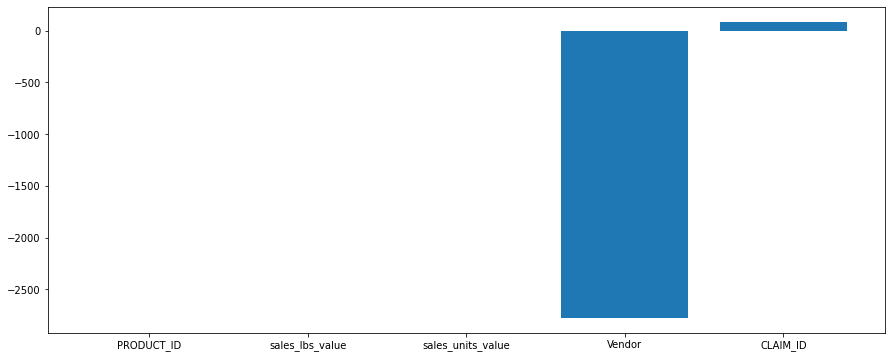

In [145]:
# Apply a normal linear regression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

# predicting on test
linearreg_prediction = linearreg.predict(X_test)

# calculating R_square
R_squared = r2_score(linearreg_prediction,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(linearreg.coef_)
print(coefficient_df.head())

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

R squared Error on test set :  0.7405215828299426
         Column_Name  Coefficient_Value
0         PRODUCT_ID               0.00
1    sales_lbs_value               0.46
2  sales_units_value               0.52
3             Vendor           -2779.29
4           CLAIM_ID              89.48


<BarContainer object of 5 artists>

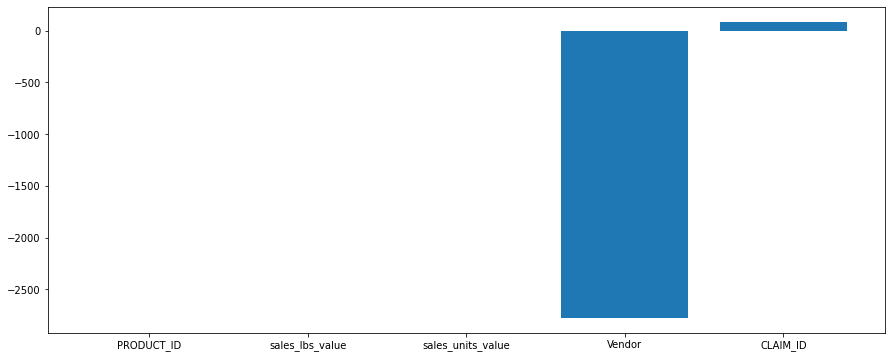

In [146]:
# import ridge regression library
from sklearn.linear_model import Ridge

# Train the model
ridgeRegressor = Ridge(alpha = 0.5) #here setting alpha is nothing but lambda in the formula
ridgeRegressor.fit(X_train, y_train)
y_predicted_ridge = ridgeRegressor.predict(X_test)

# calculating R_square
R_squared = r2_score(y_predicted_ridge,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

R squared Error on test set :  0.7405214471826876
         Column_Name  Coefficient_Value
0         PRODUCT_ID               0.00
1    sales_lbs_value               0.46
2  sales_units_value               0.52
3             Vendor           -2779.11
4           CLAIM_ID              89.47


<BarContainer object of 5 artists>

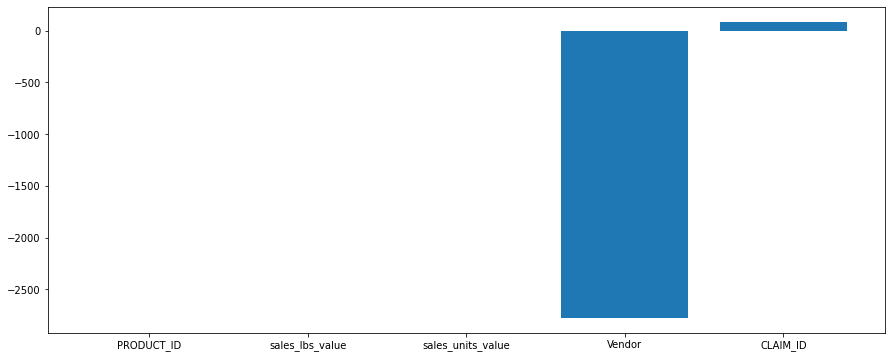

In [147]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lassoRegressor = Lasso(alpha = 1) #here setting alpha is nothing but lambda in the formula
lassoRegressor.fit(X_train, y_train)
y_predicted_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(lassoRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

In [148]:
# Linear Regression with cross validation

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-1564658138.4726968


In [150]:
## Hyper Prameter Tuning

In [151]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-1337283413.8354266


In [152]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.223e+13, tolerance: 5.731e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.607e+13, tolerance: 6.074e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 1e-15}
-1564658138.4726968


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.177e+13, tolerance: 7.568e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
def StandardScaler(data):
    le=StandardScaler()
    le.fit(data)
    x=le.transform(data)
    dat1=pd.DataFrame(x)
    dat1.columns=data.columns
    data=data1
    return data

#### Pls find below git hub link for another project on linear regression

######    https://github.com/NagendraProjects/Forecast_Regression

##### By using above project in github, we will deploy the model

In [ ]:
#clustering 

In [153]:
base_data_label_encoded.head(2)

,PRODUCT_ID,sales_lbs_value,sales_units_value,Vendor,CLAIM_ID,sales_dollars_value
0,1.00,18680.00,934.00,7,0.00,13927.00
1,3.00,28646.00,1592.00,7,0.00,10289.00


In [154]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=10).fit(base_data_label_encoded)

In [155]:
labels=kmeans.labels_

In [156]:
labels

array([0, 0, 0, ..., 8, 0, 0], dtype=int32)

In [157]:
val=pd.DataFrame(data=labels,columns=['sample'])

In [158]:
val['sample'].value_counts()

0    95028
8     6782
5     1427
7      494
3      489
4      446
9      206
6       88
1       43
2       14
Name: sample, dtype: int64

In [159]:
base_data_label_encoded['cluster']=labels

In [160]:
base_data_label_encoded['cluster'].value_counts()

0    95028
8     6782
5     1427
7      494
3      489
4      446
9      206
6       88
1       43
2       14
Name: cluster, dtype: int64

In [161]:

wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(base_data_label_encoded)

    wcss.append(kmeans.inertia_)

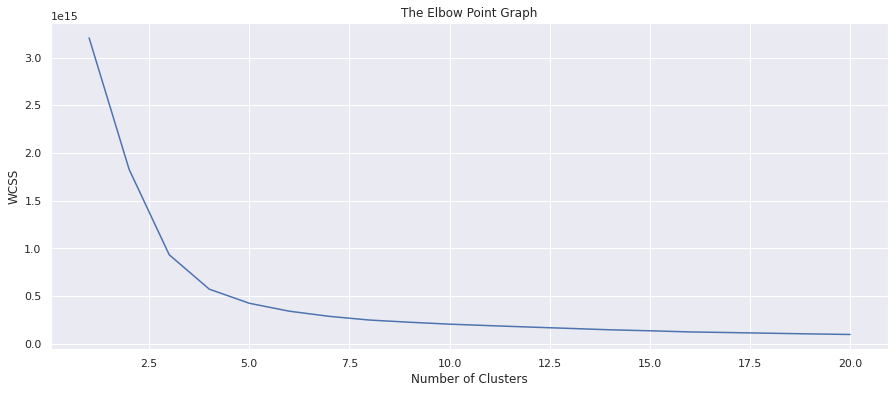

In [162]:
sns.set()
plt.plot(range(1,21), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from above we can say that optimal number of clusters are 5 so we divide or segment our data into 5 clusters.

In [169]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=10).fit(base_data_label_encoded)

In [170]:
labels=kmeans.labels_

In [171]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [172]:
val=pd.DataFrame(data=labels,columns=['sample'])

In [173]:
val['sample'].value_counts()

0    100380
4      3864
2       638
1       121
3        14
Name: sample, dtype: int64

In [174]:
base_data_label_encoded['cluster']=labels

In [175]:
base_data_label_encoded['cluster'].value_counts()

0    100380
4      3864
2       638
1       121
3        14
Name: cluster, dtype: int64